In [488]:
import seaborn as sns
import pandas as pd
import os.path
import os

HERE = os.path.dirname(os.path.abspath('__file__'))
PROJECT_ROOT = os.path.abspath(os.path.join(HERE, '../../..'))

IMAGE_DUMP_DIR = os.path.join('/Users/nicovsjj/Documents/Repos/rem/REmatch-papers/VLDB23/figures/results/boxplots')

In [489]:
EXPERIMENT_RESULTS = {
    "dna": "exp/crossings/dna/lookahead/results/libraries-lookahead/2023-02-01_04:51:21",
    "morphemes": "exp/crossings/morphemes/lookahead/results/libraries-lookahead/2023-02-01_05:00:31",
    "sparql": "exp/crossings/sparql/1-var/lookahead/results/libraries-lookahead/2023-02-01_06:12:29",
}

EXPERIMENT_RESULTS = {
    "dna": "exp/crossings/dna/1var/results/rematch-versions/2023-01-30_17:51:01",
    "morphemes": "exp/crossings/morphemes/2grams/results/rematch-versions/2023-01-30_18:15:59",
    "sparql": "exp/crossings/sparql/1-var/2lines/results/rematch-versions/2023-01-30_21:05:58",
}

DOCUMENTS = {
    "dna": "datasets/dna/proteoms/zebrafish.faa",
    "morphemes": "datasets/english-works/english-authors.txt",
    "sparql": "datasets/RKBExplorer/sparql.log.1",
}


EXPERIMENT_MEASURES = ["time", "memory", "outputs", "throughput", "fot"]


BINARY_NAMES = ["REmatch", "RE2", "PCRE", "PCRE2", "boost", "oniguruma", "TRE"]
BINARY_NAMES = ["vanilla", "memory", "ascii-array", "offset", "early-output", "search"]

BINARY_TRANSLATIONS = {
    "REmatch": "REmatch",
    "RE2": "RE2",
    "PCRE": "PCRE",
    "PCRE2": "PCRE2",
    "boost": "Boost",
    "oniguruma": "Oniguruma",
    "TRE": "TRE",
    "vanilla": "Naive",
    "memory": "Node Manager",
    "ascii-array": "Next Index",
    "offset": "Offset",
    "early-output": "Early Output",
    "search": "Light Search",
}


stats_dict = dict()

original_df = pd.DataFrame(
    {
        "query": [],
        "dataset": [],
        "library": [],
        "time": [],
        "memory": [],
        "outputs": [],
        "throughput": [],
        "fot": [],
    }
)
for dataset, path in EXPERIMENT_RESULTS.items():
    stats_dict[dataset] = {}
    dataset_df = pd.DataFrame({"query": [], "dataset": [], "library": []})
    for measure in EXPERIMENT_MEASURES:
        stats_dict[dataset][measure] = {}
        with open(os.path.join(PROJECT_ROOT, path, measure + ".csv")) as f:
            measure_df = pd.read_csv(f)
            measure_df = measure_df[["query", *BINARY_NAMES]]
            for lib in BINARY_NAMES:
                stats_dict[dataset][measure][lib] = {}
                if measure == "memory":
                    measure_df[lib] = (
                        measure_df[lib]
                        - os.path.getsize(
                            os.path.join(PROJECT_ROOT, DOCUMENTS[dataset])
                        )
                    ) / 1024**2

                stats_dict[dataset][measure][lib]["mean"] = round(
                    measure_df[lib].mean(), 2
                )
                stats_dict[dataset][measure][lib]["median"] = measure_df[lib].median()
            measure_df["dataset"] = dataset
            measure_df = measure_df.melt(
                id_vars=["query", "dataset"], var_name="library", value_name=measure
            )
            dataset_df = pd.merge(
                dataset_df, measure_df, on=["query", "dataset", "library"], how="outer"
            )
    original_df = pd.concat([original_df, dataset_df], ignore_index=True)

if "vanilla" in BINARY_NAMES:
    original_df["time"] = original_df["time"] / 1000
    original_df["fot"] = original_df["fot"] / 1000

/var/folders/s4/tm7lf8zx5nn5czvx03gkbk3m0000gn/T/ipykernel_52657/1381518819.py:80: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  measure_df = measure_df.melt(
/var/folders/s4/tm7lf8zx5nn5czvx03gkbk3m0000gn/T/ipykernel_52657/1381518819.py:80: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  measure_df = measure_df.melt(
/var/folders/s4/tm7lf8zx5nn5czvx03gkbk3m0000gn/T/ipykernel_52657/1381518819.py:80: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a uniq

In [490]:
import json

with open(os.path.join(HERE, "stats.json"), "w") as f:
    json.dump(stats_dict, f, indent=2)

[]


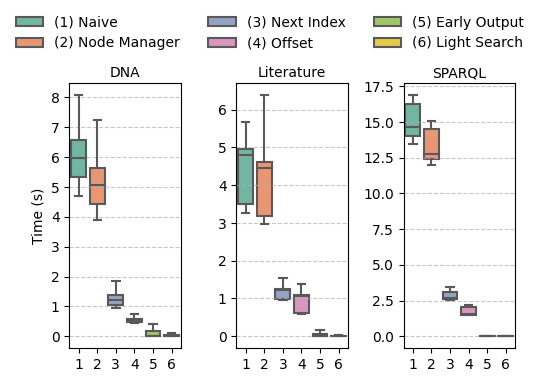

In [491]:
import matplotlib.pyplot as plt
import matplotlib.patches

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5.75, 3.45))

measure = "fot"

sns.boxplot(
    data=original_df[(original_df["dataset"] == "dna")],
    y=measure,
    x="library",
    dodge=True,
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[0],
)

sns.boxplot(
    data=original_df[(original_df["dataset"] == "morphemes")],
    y=measure,
    x="library",
    dodge=True,
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[1],
)

sns.boxplot(
    data=original_df[
        (original_df["dataset"] == "sparql") & (original_df["library"] != "TRE")
    ],
    y=measure,
    x="library",
    dodge=True,
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[2],
)

axs[0].set_ylabel("Time (s)")
axs[1].set_ylabel("")
axs[2].set_ylabel("")

axs[0].set_xlabel("DNA")
axs[1].set_xlabel("Literature")
axs[2].set_xlabel("SPARQL")

for ax in axs:
    # ax.legend().remove()
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(list(range(1, len(BINARY_NAMES) + 1)))
    ax.grid(axis="y", linestyle="--", alpha=0.7)

handles, labels = axs[0].get_legend_handles_labels()

r = matplotlib.patches.Rectangle(
    (0, 0), 1, 1, fill=False, edgecolor="none", visible=False
)

print(labels)

axs[0].legend(
    axs[0].patches,
    [f"({i+1}) {BINARY_TRANSLATIONS[label]}" for i,label in enumerate(BINARY_NAMES)],
    loc="upper center",
    bbox_to_anchor=(1.8, 1.3),
    ncol=3,
    frameon=False,
)

fig.subplots_adjust(wspace=0.5)

fig.savefig(
    os.path.join(IMAGE_DUMP_DIR, f"versions-{measure}.pdf"), bbox_inches="tight"
)

plt.show()

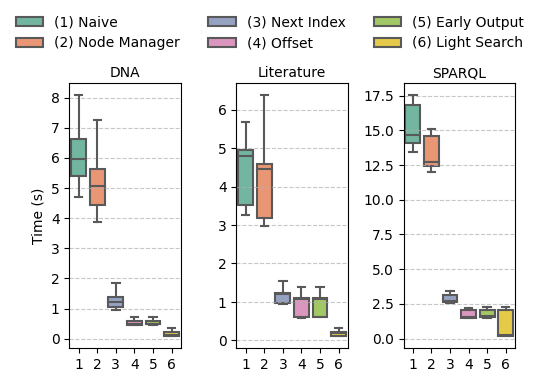

In [492]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5.75, 3.45))

measure = 'time'

sns.boxplot(
    data=original_df[(original_df["dataset"] == "dna")],
    y=measure,
    x="library",
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[0]
)

sns.boxplot(
    data=original_df[ (original_df["dataset"] == "morphemes")],
    y=measure,
    x="library",
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[1]
)

sns.boxplot(
    data=original_df[(original_df["dataset"] == "sparql") & (original_df["library"] != "TRE")],
    y=measure,
    x="library",
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[2]
)

axs[0].set_ylabel("Time (s)")
axs[1].set_ylabel("")
axs[2].set_ylabel("")

axs[0].set_xlabel("DNA")
axs[1].set_xlabel("Literature")
axs[2].set_xlabel("SPARQL")

for ax in axs:
    # ax.legend().remove()
    # ax.set_xticks([])
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels(list(range(1, len(BINARY_NAMES)+1)))
    ax.grid(axis="y", linestyle="--", alpha=0.7)

axs[0].legend(
    axs[0].patches,
    [f"({i+1}) {BINARY_TRANSLATIONS[label]}" for i,label in enumerate(BINARY_NAMES)],
    loc="upper center",
    bbox_to_anchor=(1.8, 1.3),
    ncol=3,
    frameon=False,
)

fig.subplots_adjust(wspace=0.5)

fig.savefig(os.path.join(IMAGE_DUMP_DIR, f"versions-{measure}.pdf"), bbox_inches="tight")

plt.show()

In [493]:
EXPERIMENT_RESULTS = {
    "dna": "exp/crossings/dna/lookahead/results/libraries-lookahead/2023-02-01_04:51:21",
    "morphemes": "exp/crossings/morphemes/lookahead/results/libraries-lookahead/2023-02-01_05:00:31",
    "sparql": "exp/crossings/sparql/1-var/lookahead/results/libraries-lookahead/2023-02-01_06:12:29",
}

# EXPERIMENT_RESULTS = {
#     "dna": "exp/crossings/dna/1var/results/rematch-versions/2023-01-30_17:51:01",
#     "morphemes": "exp/crossings/morphemes/2grams/results/rematch-versions/2023-01-30_18:15:59",
#     "sparql": "exp/crossings/sparql/1-var/2lines/results/rematch-versions/2023-01-30_21:05:58",
# }

DOCUMENTS = {
    "dna": "datasets/dna/proteoms/zebrafish.faa",
    "morphemes": "datasets/english-works/english-authors.txt",
    "sparql": "datasets/RKBExplorer/sparql.log.1",
}


EXPERIMENT_MEASURES = ["time", "memory", "outputs", "throughput", "fot"]


BINARY_NAMES = ["REmatch", "RE2", "PCRE", "PCRE2", "boost", "oniguruma", "TRE"]
# BINARY_NAMES = ["vanilla", "memory", "ascii-array", "offset", "early-output", "search"]

BINARY_TRANSLATIONS = {
    "REmatch": "REmatch",
    "RE2": "RE2",
    "PCRE": "PCRE",
    "PCRE2": "PCRE2",
    "boost": "Boost",
    "oniguruma": "Oniguruma",
    "TRE": "TRE",
    "vanilla": "Naive",
    "memory": "Node Manager",
    "ascii-array": "Next Index",
    "offset": "Offset",
    "early-output": "Early Output",
    "search": "Light Search",
}


stats_dict = dict()

original_df = pd.DataFrame(
    {
        "query": [],
        "dataset": [],
        "library": [],
        "time": [],
        "memory": [],
        "outputs": [],
        "throughput": [],
        "fot": [],
    }
)
for dataset, path in EXPERIMENT_RESULTS.items():
    stats_dict[dataset] = {}
    dataset_df = pd.DataFrame({"query": [], "dataset": [], "library": []})
    for measure in EXPERIMENT_MEASURES:
        stats_dict[dataset][measure] = {}
        with open(os.path.join(PROJECT_ROOT, path, measure + ".csv")) as f:
            measure_df = pd.read_csv(f)
            measure_df = measure_df[["query", *BINARY_NAMES]]
            for lib in BINARY_NAMES:
                stats_dict[dataset][measure][lib] = {}
                if measure == "memory":
                    measure_df[lib] = (
                        measure_df[lib]
                        - os.path.getsize(
                            os.path.join(PROJECT_ROOT, DOCUMENTS[dataset])
                        )
                    ) / 1024**2

                stats_dict[dataset][measure][lib]["mean"] = round(
                    measure_df[lib].mean(), 2
                )
                stats_dict[dataset][measure][lib]["median"] = measure_df[lib].median()
            measure_df["dataset"] = dataset
            measure_df = measure_df.melt(
                id_vars=["query", "dataset"], var_name="library", value_name=measure
            )
            dataset_df = pd.merge(
                dataset_df, measure_df, on=["query", "dataset", "library"], how="outer"
            )
    original_df = pd.concat([original_df, dataset_df], ignore_index=True)

In [494]:
import json

with open(os.path.join(HERE, "stats.json"), "w") as f:
    json.dump(stats_dict, f, indent=2)

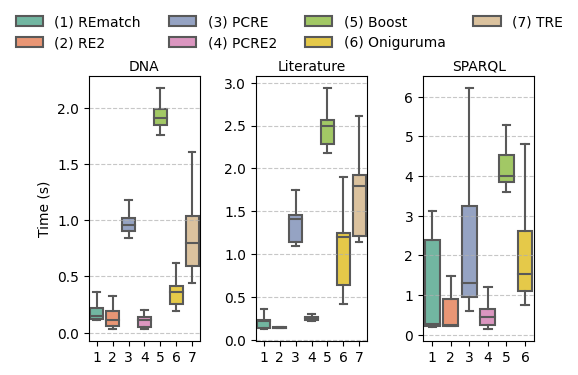

In [495]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5.75, 3.45))

measure = "time"

sns.boxplot(
    data=original_df[(original_df["dataset"] == "dna")],
    y=measure,
    x="library",
    dodge=True,
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[0],
    labels=['1']
)

sns.boxplot(
    data=original_df[(original_df["dataset"] == "morphemes")],
    y=measure,
    x="library",
    dodge=True,
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[1],
)

sns.boxplot(
    data=original_df[
        (original_df["dataset"] == "sparql") & (original_df["library"] != "TRE")
    ],
    y=measure,
    x="library",
    dodge=True,
    orient="v",
    palette="Set2",
    showfliers=False,
    ax=axs[2],
)

axs[0].set_ylabel("Time (s)")
axs[1].set_ylabel("")
axs[2].set_ylabel("")

axs[0].set_xlabel("DNA")
axs[1].set_xlabel("Literature")
axs[2].set_xlabel("SPARQL")

axs[0].set_xticklabels(list(range(1, len(BINARY_NAMES) + 1)))
axs[1].set_xticklabels(list(range(1, len(BINARY_NAMES) + 1)))
axs[2].set_xticklabels(list(range(1, len(BINARY_NAMES))))

for ax in axs:
    # ax.legend().remove()
    ax.xaxis.set_label_position("top")
    ax.grid(axis="y", linestyle="--", alpha=0.7)


axs[0].legend(
    axs[0].patches,
    [f"({i+1}) {BINARY_TRANSLATIONS[label]}" for i, label in enumerate(BINARY_NAMES)],
    loc="upper center",
    bbox_to_anchor=(1.8, 1.275),
    ncol=4,
    frameon=False,
)

fig.subplots_adjust(wspace=0.5)

fig.savefig(
    os.path.join(IMAGE_DUMP_DIR, f"lookahead-{measure}.pdf"), bbox_inches="tight"
)

plt.show()